In [207]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso, ElasticNet
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [208]:
data = pd.read_csv(r'C:\Users\Aaron\OneDrive\Desktop\boston.csv')

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


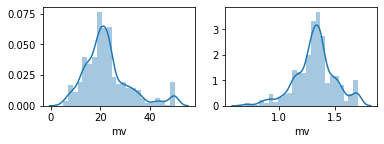

In [210]:
plt.subplot(2,2,1);
display(sns.distplot(data.mv));

plt.subplot(2,2,2);
display(sns.distplot(np.log10(data.mv)));

In [211]:
#'neighborhood',
X = data[['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']]
y = data['mv']

In [275]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=101)

In [278]:
#Random Forest Regressor


lab_enc = preprocessing.LabelEncoder()

y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)
rf_Model = RandomForestRegressor(n_estimators = 100, max_features='log2',bootstrap = True,random_state=45)
rf_Model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=45, verbose=0,
                      warm_start=False)

In [214]:
rf_Model.oob_score

False

In [279]:
rf_Model.score(X_train,y_train)

0.9706836887259757

In [280]:
rf_Model.score(X_test,y_test)

-1.1151828504781025

In [281]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(n_estimators = 100, max_features='log2',bootstrap = True,random_state=45), X_train, y_train, cv=5, scoring='r2')

In [285]:
scores.mean()
scores.std()

0.041957722874889296

In [292]:
scores = cross_val_score(RandomForestRegressor(n_estimators = 100, max_features='log2',bootstrap = True,random_state=45), X_test, y_test, cv=5, scoring='r2')

In [293]:
display(scores.std())

display(scores.mean())

0.06283498191377926

0.7730853353421392

In [221]:
#Lasso Regression

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=101)

lassReg = Lasso()
lassReg = lassReg.fit(X_train,y_train)

scores = cross_val_score(lassReg,X_test,y_test,cv=5,scoring='r2')
display(scores.mean())
display(scores.std())



0.6031108169849726

0.03999442455949655

In [222]:
#ElasticNet
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=101)

elasReg = ElasticNet()
scores = cross_val_score(elasReg,X_test,y_test,cv=5,scoring='r2')
display(scores.mean())
display(scores.std())


0.6058348404155225

0.036431917659539036

In [266]:
#Gradient Boost Regressor
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=101)

gradientReg = GradientBoostingRegressor(max_depth=4,n_estimators=500,learning_rate=.03,max_features='log2',random_state = 45)
scores = cross_val_score(gradientReg,X_test,y_test,cv=5,scoring='r2')
display(scores.mean())
display(scores.std())


0.8078561728470026

0.09625982636374678

In [269]:
modelGB = gradientReg.fit(X_train,y_train)
display(cross_val_score(modelGB,X_test,y_test,cv=5,scoring='r2').mean())
display(cross_val_score(modelGB,X_test,y_test,cv=5,scoring='r2').std())

0.8078561728470026

0.09625982636374678

In [270]:
randForestReg = RandomForestRegressor(n_estimators = 100, max_features='log2',bootstrap = True,random_state=45)
modelRFG = randForestReg.fit(X_train,y_train)
display(cross_val_score(modelRFG,X_test,y_test,cv=5,scoring='r2').mean())
display(cross_val_score(modelRFG,X_test,y_test,cv=5,scoring='r2').std())


0.7823891104269529

0.11099704390298486

In [271]:
modelGB.feature_importances_

array([0.05271703, 0.02062472, 0.04105985, 0.0111263 , 0.1001809 ,
       0.21088199, 0.0222372 , 0.06225414, 0.00538868, 0.0233014 ,
       0.11919637, 0.33103141])

In [272]:
modelRFG.feature_importances_

array([0.07023859, 0.01461743, 0.0661587 , 0.0075361 , 0.07560915,
       0.24758354, 0.03836109, 0.06968603, 0.01609631, 0.04669959,
       0.06534521, 0.28206827])

In [273]:
X = data[['rooms','ptratio','lstat']]
y = data['mv']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=101)

lassReg = Lasso()
lassReg = lassReg.fit(X_train,y_train)

scores = cross_val_score(lassReg,X_test,y_test,cv=5,scoring='r2')
display(scores.mean())
display(scores.std())


0.5906473123209395

0.04750256997418907